In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.spatial.distance import cdist
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import collections
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import time
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('ggplot')  # 更改绘图风格 R语言绘图库的风格
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 数据来源
https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
Bank Customer Churn

分析任务：  
1.不同指标和用户流失的相关性。  
2.使用机器学习预测用户是否会流失。

In [2]:
df= pd.read_csv('Customer-Churn-Records.csv')

In [3]:
## 查看数据

In [4]:
# 查看数据格式，数据格式无异常。也不存在空值。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
# 更改列名。方便后续查看
df.columns = ['序号','ID','姓氏','用户信用分','地理位置','性别','年龄','用户年限',
              '余额','购买产品数量','是否有信用卡','是否活跃','预计工资','是否流失','投诉','满意度','持卡类型',
              '信用卡积分']

In [7]:
df.head()

,序号,ID,姓氏,用户信用分,地理位置,性别,年龄,用户年限,余额,购买产品数量,是否有信用卡,是否活跃,预计工资,是否流失,投诉,满意度,持卡类型,信用卡积分
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
df.columns

Index(['序号', 'ID', '姓氏', '用户信用分', '地理位置', '性别', '年龄', '用户年限', '余额', '购买产品数量',
       '是否有信用卡', '是否活跃', '预计工资', '是否流失', '投诉', '满意度', '持卡类型', '信用卡积分'],
      dtype='object')

In [9]:
# 查看各列字段的标签数
for i in df.columns:
    a = df[i].value_counts()
    if len(a)>30:
        pass
    else:
        print(a,'\n')

France     5014
Germany    2509
Spain      2477
Name: 地理位置, dtype: int64 

Male      5457
Female    4543
Name: 性别, dtype: int64 

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: 用户年限, dtype: int64 

1    5084
2    4590
3     266
4      60
Name: 购买产品数量, dtype: int64 

1    7055
0    2945
Name: 是否有信用卡, dtype: int64 

1    5151
0    4849
Name: 是否活跃, dtype: int64 

0    7962
1    2038
Name: 是否流失, dtype: int64 

0    7956
1    2044
Name: 投诉, dtype: int64 

3    2042
2    2014
4    2008
5    2004
1    1932
Name: 满意度, dtype: int64 

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: 持卡类型, dtype: int64 



小结：  
通过数据查看，发现数据集没有存在脏数据，可以直接进入下一个环节。

# 流失相关性分析

In [10]:
# 取出有用信息
df_lose_corr = df.loc[:,[ '用户信用分', '地理位置', '性别', '年龄', '用户年限', '余额', '购买产品数量',
       '是否有信用卡', '是否活跃', '预计工资', '是否流失', '投诉', '满意度', '持卡类型', '信用卡积分']]

In [ ]:
# 绘制热力图
df_lose_corr_table = df_lose_corr.corr()

plt.figure(figsize = (16,8))
plt.title('相关性')
sns.heatmap(df_lose_corr_table,cmap='Blues',annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (16,8))
df.corr()['是否流失'].sort_values(ascending=False).plot(kind='bar')

通过观察图表，发现投诉和是否流失存在非常强的相关性。用户年龄、活跃度、余额四个指标和是否流失存在一定相关性(相关系数绝对值大于10%)

# 流失人数占比

In [35]:
# 划分类别
# 用户一般信息
u1 = ['用户信用分','地理位置', '性别', '年龄', '用户年限','是否活跃'] 
# 用户经济情况
u2 = ['预计工资', '余额', '购买产品数量']
# 用户满意度
u3 = ['投诉', '满意度']
# 信用卡
u4 = ['是否有信用卡','持卡类型', '信用卡积分']

In [220]:
def plt_img(x, figsize=(8, 4), dpi=60):
    for i in x:
        a = (df_lose_corr.groupby([i])['是否流失'].value_counts()/len(df_lose_corr[i])).to_frame()
        a.rename(columns={"是否流失":'流失率'},inplace=True)
        a.reset_index(inplace=True)

        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
        if len(a) >= 10:
            sns.kdeplot(df_lose_corr[df_lose_corr['是否流失']==0][i].dropna(), ax=ax, label='未流失',shade = True)
            sns.kdeplot(df_lose_corr[df_lose_corr['是否流失']==1][i].dropna(), ax=ax, label='已流失',shade = True)
            ax.set_xlabel(i)
            ax.set_ylabel('流失率')
            ax.set_title(f'{i}与流失的关系')
            ax.legend()
        else:
            a["是否流失"].replace({0:'未流失',1:"已流失"},inplace=True)
            if i == '是否活跃':
                a[i].replace({0:'否',1:"是"},inplace=True)
            sns.barplot(ax=ax, x=i, y='流失率', hue='是否流失', data=a)

            ax.set_xlabel(i)
            ax.set_ylabel('流失率')
            ax.set_title(f'{i}与流失的关系')
            ax.legend()
            
    plt.show()

## 用户一般信息和流失的关系

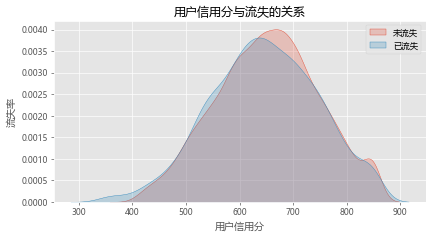

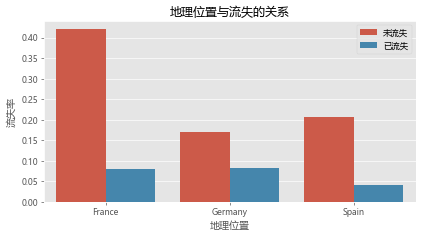

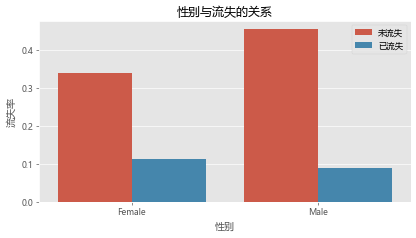

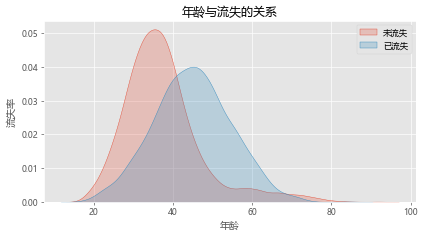

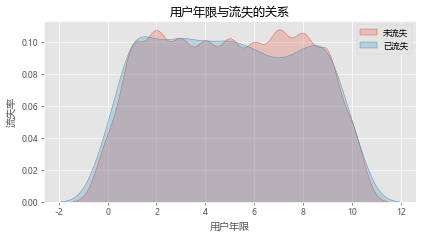

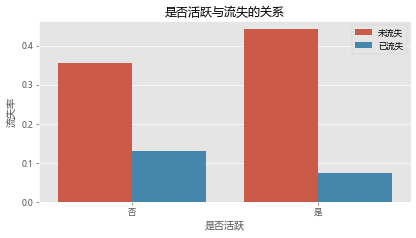

In [221]:
plt_img(u1)

各标签与流失关系：  
1,信用分：密度图呈现单峰，600分左右的用户最容易流失。  
2,地域，图形呈现的相对比例。西班牙和法国的用户流失率更低，德国用户的流失率占比约50%。  
3,性别，男性比女性用户更不容易流失。  
4,年龄，30岁左右的用户不容易流失，45岁左右的用户容易流失。  
5,年限，流失用户的年限分布比较平均。新加入用户在满1年后，流失率逐年下降。第7年的用户流失率最低。  
6,活跃度，活跃度高的用户更不容易流失。  

## 用户经济情况和流失的关系

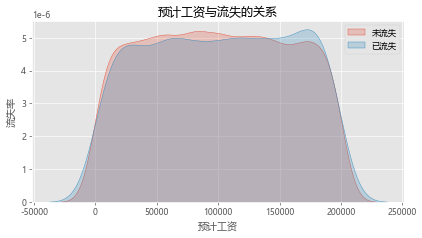

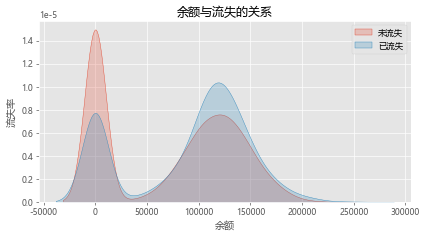

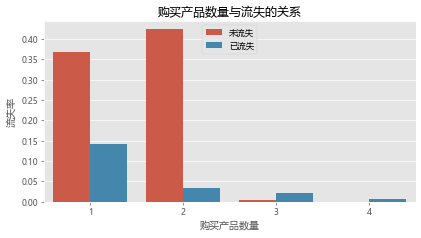

In [222]:
plt_img(u2)

1.预计工资和流失率不存在比较明显的关系。  
2.没有余额的用户流失率最低，可能是该批用户都是新用户。而余额在10~15万之间的用户流失率最高。  
3.购买了一样产品的用户流失率最高，购买两样产品的用户群体最多，但流失率最低，购买数量越往上，流失率越高。  

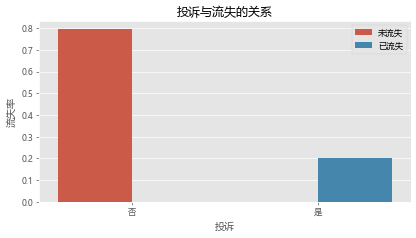

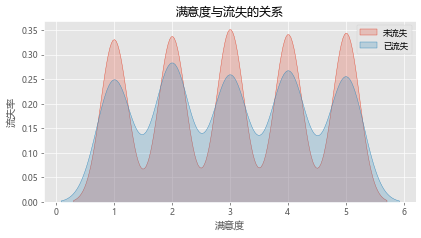

In [209]:
plt_img(u3)

1.投诉，有投诉的用户基本都已经流失。  
2.满意度，满意度和流失的关系不明显。

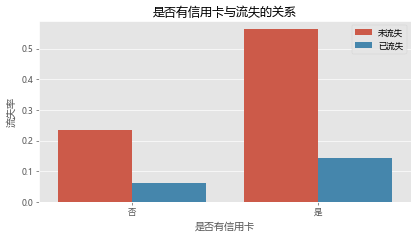

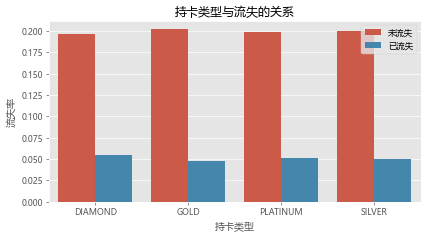

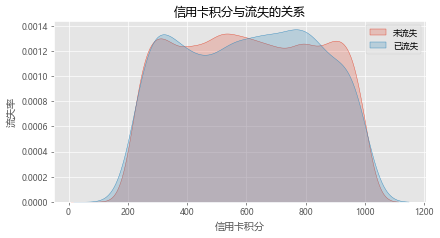

In [210]:
plt_img(u4)

1.信用卡,持有信用卡的用户相比于没有信用卡的用户更不容易流失。但差别有限。  
2.持卡类型,不同信用卡类型的用户与是否流失的关系不明显。  
3.信用卡积分,呈现比较明显的双峰。信用卡积分在200分和800分左右最容易流失，尤其是在800分的阶段。  

### 小结：
较高流失率用户的特征：  
用户一般信息特征： 德国用户、用户信用分在600~700分之间、女性、年龄在45岁左右，年限在1年和8年、不活跃。  
用户经济情况特征： 余额在150000左右。购买产品数量不等于2  
用户满意度特征： 有过一次投诉  


In [227]:
df.head()

,序号,ID,姓氏,用户信用分,地理位置,性别,年龄,用户年限,余额,购买产品数量,是否有信用卡,是否活跃,预计工资,是否流失,投诉,满意度,持卡类型,信用卡积分
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 流失预测

In [231]:
# 数据预处理。
# 因为有部分字段的数据是离散的。所以需要对这部分数据进行转码。
# 因为投诉的相关性太强。为了模型效果。暂不提取。
df_fea = df.loc[:,['年龄','余额','性别','地理位置','用户年限','购买产品数量','是否活跃','是否流失']].copy()

In [234]:
label_encoder = LabelEncoder()
df_fea['地理位置'] = label_encoder.fit_transform(df['地理位置'])
df_fea['性别'] = label_encoder.fit_transform(df['性别'])

In [255]:
df_fea_train = df_fea.loc[:,['年龄','余额','性别','地理位置','用户年限','购买产品数量','是否活跃']].copy()
df_fea_test = df_fea.loc[:,['是否流失']].copy()

train_x, test_x = df_fea_train[:7000],df_fea_train[7000:9000]
train_y, test_y = df_fea_test[:7000],df_fea_test[7000:9000]

# 构造各种分类器
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
    AdaBoostClassifier(random_state = 1), 
    MLPClassifier(random_state = 1)
]
# 分类器名称
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
            'adaboostclassifier',
            'mlpclassifier'
]
# 分类器参数
#注意分类器的参数，字典键的格式，GridSearchCV对调优的参数格式是"分类器名"+"__"+"参数名"
classifier_param_grid = [
            {'svc__C':[0.1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':range(1,11)} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
            {'adaboostclassifier__n_estimators':[70,80,90]},
            {'mlpclassifier__hidden_layer_sizes':[(100,50),(80,40),(90,),(50,20)]}
]



In [256]:
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy_score'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv=3, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch 最优参数：", search.best_params_)
    print("GridSearch 最优分数： %0.4lf" %search.best_score_)
    #采用predict函数（特征是测试数据集）来预测标识，预测使用的参数是上一步得到的最优参数
    predict_y = gridsearch.predict(test_x)
    print(" 准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    #采用 StandardScaler 方法对数据规范化：均值为0，方差为1的正态分布
    pipeline = Pipeline([
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')


GridSearch 最优参数： {'svc__C': 0.1, 'svc__gamma': 0.01}
GridSearch 最优分数： 0.7939
 准确率 0.7925
GridSearch 最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch 最优分数： 0.8481
 准确率 0.8575
GridSearch 最优参数： {'randomforestclassifier__n_estimators': 10}
GridSearch 最优分数： 0.8396
 准确率 0.8485
GridSearch 最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch 最优分数： 0.7894
 准确率 0.7865
GridSearch 最优参数： {'adaboostclassifier__n_estimators': 70}
GridSearch 最优分数： 0.8550
 准确率 0.8580
GridSearch 最优参数： {'mlpclassifier__hidden_layer_sizes': (100, 50)}
GridSearch 最优分数： 0.7961
 准确率 0.8010


In [265]:
# 使用上述得到的最优模型
model =  AdaBoostClassifier(n_estimators=70)
model.fit(train_x,train_y)

# 取数据集的后1000条做预测
df_fea_train_pred = df_fea_train[9000:].copy()

pred_x =  df_fea_train_pred

# 预测值
pred_y = model.predict(pred_x)

# 预测结果
df_fea_test_pred = df_fea_test.loc[9000:]
df_fea_test_pred['预测'] = pred_y


print(f"预测{len(df_fea_test_pred)}条，命中{sum(df_fea_test_pred['是否流失'] == df_fea_test_pred['预测'])}条")

预测1000条，命中857


总结：  
1.用户流失率在20%左右。当用户有过一次投诉之后，几乎百分百会流失。因此可以针对流失用户的投诉原因进行分析，避免出现类似投诉。  
2.当用户购买数量等于1时，容易流失，大于2时也容易流失，因此可以增加对购买数为1的用户的资源投入，促使其多购买产品。到达2后便停止营销。  
3.针对与即将1年和8年的用户，分析这两个年限段的用户流失原因，提供相应的解决方案。  
4.分析德国用户的喜好和需求，提供更加适合德国用户的产品和服务，增加他们的满意度，从而降低流失率。  